### Question 1: Estimate the value of $\int_{0}^{2} \cos(x)dx$

#### 1. Rewrite the above as an expectation: 
\begin{equation}
\int_{0}^{2} \cos(x)dx = 2\int_{0}^{2} \frac{1}{2}\cos(x)dx = 2\mathbb{E}(\cos X) \\
\text{where } X \sim Unif(0,2) \text{ with pdf } f(x) = \frac{1}{2}
\end{equation}

In [ ]:
# import libraries
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

In [ ]:
# let's write a general method to integrate any form of function
def monte_carlo_integration(inner_func, outer_func, dist, sample_size = 1000):
    '''
        inner_func: the function to take expectation of (inside E[]), take np.array as input and return array of point-wise values
        outer_func: the function with respect to the expectation
        dist: the distribution of random variable X
    '''
    samples = dist.rvs(size = sample_size)
    func_values = inner_func(samples)
    func_mean = np.mean(func_values)
    estimated_val = outer_func(func_mean)
    func_std = np.std(outer_func(func_values))/np.sqrt(sample_size)
    return estimated_val, func_std

#### 2. Estimate the value of the integral, using samples sizes of 1000, 2000, ..., 50000

In [ ]:
cos_estimates = []
cos_std = []

inner_func = np.cos
outer_func = lambda m: 2*m
for size in range(1000, 50001, 1000):
    m, s = monte_carlo_integration(inner_func, outer_func, stats.uniform(loc=0, scale=2), sample_size = size) # X follows Unif(0,2)
    cos_estimates.append(m)
    cos_std.append(s)

#### 3. Plot the estimates against the analytical value of the integral

First, let's solve the integral analytically
\begin{equation}
\int_{0}^{2} \cos(x)dx = \sin(x) \big\rvert_{0}^{2} = \sin(2) - \sin(0) = sin(2)
\end{equation}

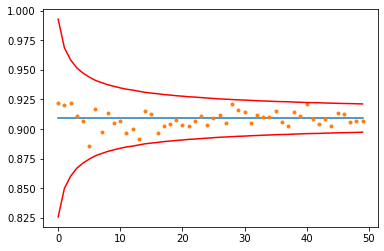

In [ ]:
analytical_val = np.sin(2)
plt.plot([analytical_val] * 50)
plt.plot(cos_estimates, '.')
plt.plot(analytical_val + 3*np.array(cos_std), 'r')
plt.plot(analytical_val - 3*np.array(cos_std), 'r')
plt.show()

### Question 2: Price a European put option

- Share volatility: 30%
- Risk-free rate: 10%
- Average share return: 15%
- Current share price: \$100
- Strike price: \$110
- Term of contract: 6 months (0.5 year)

In [ ]:
# initialize the variables
sigma = 0.3
r = 0.1
S0 = 100
K = 110
T = 0.5

#### 1. Write a function which takes a risk-free rate, initial share price, the share volatility, and term as inputs, and determines the value of a share price, assuming geometric Brownian Motion

In [ ]:
def terminal_price(r, S0, sigma, T, Z):
    return S0 * np.exp((r - sigma**2/2)*T + sigma*np.sqrt(T)*Z)

#### 2. Write a function which takes terminal share prices, a strike price, a risk-free rate and term as inputs, and gives out the discounted value of a European put option

In [ ]:
def discounted_price(terminal_price, K, r, T):
    payoff = np.maximum(K - terminal_price, 0)
    price = np.exp(-r*T) * payoff
    return price.mean(), price.std()/np.sqrt(len(terminal_price))

#### 3. Write a for loop which cycles throught samples size (1000, 2000, ..., 50000), and calcualtes the Monte Carlo estimate of a European put option, as well as the stantard deviation of the Monte Carlo estimator

In [ ]:
estimated_price = []
std_price = []

for sample_size in range(1000, 50001, 1000):
    Z = stats.norm.rvs(size = sample_size)
    S_T = terminal_price(r, S0, sigma, T, Z)
    m, s = discounted_price(S_T, K, r, T)
    estimated_price.append(m)
    std_price.append(s)

#### 4. Plot the Monte Carlo estemates, the analytical European put option value, and 3 std error bounds.

In [ ]:
# solve for analytical result
t = 0
d1 = (np.log(S0/K) + (r + sigma**2/2)*(T-t)) / (sigma * np.sqrt(T - t))
d2 = d1 - sigma*np.sqrt(T-t)
phi = stats.norm.cdf
analytical_price = K*np.exp(-r*(T-t))*phi(-d2) - S0*phi(-d1)

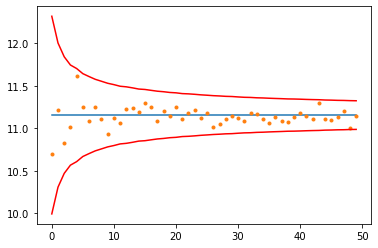

In [ ]:
plt.plot([analytical_price] * 50)
plt.plot(estimated_price, '.')
plt.plot(analytical_price + 3*np.array(std_price), 'r')
plt.plot(analytical_price - 3*np.array(std_price), 'r')
plt.show()

# Additional Questions >>>

In [ ]:
# 1. Pricing an European call option 

t = 0
d1 = (np.log(S0/K) + (r + sigma**2/2)*(T-t)) / (sigma * np.sqrt(T - t))
d2 = d1 - sigma*np.sqrt(T-t)
phi = stats.norm.cdf
analytical_price1 = S0*phi(d1) - K*np.exp(-r*(T-t))*phi(d2)

In [ ]:
# 2. Do your prices for the call and put satisfy put-call parity?
# Yes, the put and call satisfy the put-call parity


In [ ]:
#3. Which 3 markets are involved in put-call parity?
# Futures, Spot and Option are 3 markets involved in put call parity

In [ ]:
#4. How close was the option price using Monte Carlo to the option price using the analytical formula
# The Option price using the 2 methods tend to converge and less than 1 std deviation away

In [ ]:
#5. Why do we learn methods besides the analytic methods?
# Other methods like Monte carlo Simulation etc. provide us a range along with the sread of actual values 
# for accurate values.

In [ ]:
#6. Why do we prefer analytic methods?
# We prefer analytic methods as they provide precise prices w.r.t time

In [ ]:
#7. Why do theoretical prices tend to underestimate market prices
# Theoretical prices d0 not account for live market fluctualtions involving demand and supply, 
# hence underestimate the real prices

In [ ]:
#8. What role does hedging play in pricing an option?
# Hedging mitigates the excessive risk on one side, thus reducing the overall risk and price of the option.